In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('/content/CloudWatch_Traffic_Web_Attack.csv')
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [5]:
df.isnull().sum()

,0
bytes_in,0
bytes_out,0
creation_time,0
end_time,0
src_ip,0
src_ip_country_code,0
protocol,0
response.code,0
dst_port,0
dst_ip,0


In [6]:
cat_cols = [
    'src_ip',
    'src_ip_country_code',
    'protocol',
    'dst_ip',
    'rule_names',
    'observation_name',
    'source.meta',
    'source.name',
    'detection_types'
    ]

for col in cat_cols:
      le = LabelEncoder()
      df[col] = le.fit_transform(df[col])

df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,5,0,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,12,6,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,8,2,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,0,6,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,10,5,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0


In [7]:
X = df.drop(columns = ['creation_time',
                       'end_time',
                       'time'])
X

,bytes_in,bytes_out,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,detection_types
0,5602,12990,5,0,0,200,443,0,0,0,0,0,0
1,30912,18186,12,6,0,200,443,0,0,0,0,0,0
2,28506,13468,8,2,0,200,443,0,0,0,0,0,0
3,30546,14278,0,6,0,200,443,0,0,0,0,0,0
4,6526,13892,10,5,0,200,443,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2,2,0,200,443,0,0,0,0,0,0
278,3638,3190,11,3,0,200,443,0,0,0,0,0,0
279,25207794,1561220,6,6,0,200,443,0,0,0,0,0,0
280,5736,12114,7,2,0,200,443,0,0,0,0,0,0


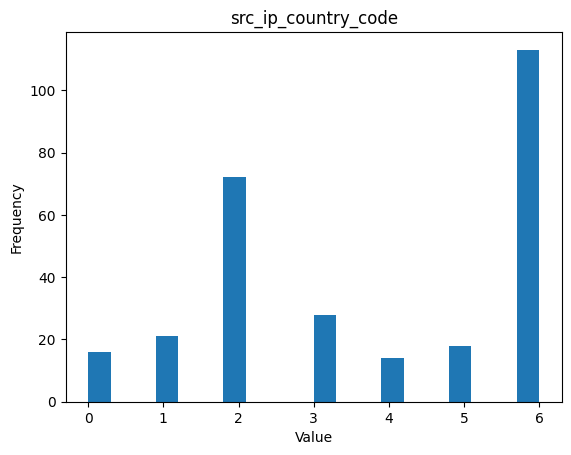

In [8]:
X['src_ip_country_code'].plot(kind = 'hist',
                              bins = 20)
plt.title('src_ip_country_code')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [9]:
rs = RobustScaler()
X = rs.fit_transform(X)
X

array([[-2.97821346e-01, -5.34764657e-02, -2.85714286e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.96619060e-01,  2.89777044e-01,  7.14285714e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.02086321e-01, -2.18992568e-02,  1.42857143e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 9.89906764e+02,  1.02224310e+02, -1.42857143e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.92556431e-01, -1.11345995e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.63055223e-01, -5.24360033e-01, -4.28571429e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [10]:
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)
model = IsolationForest(contamination = 0.01,
                        random_state = 42)
model.fit(X_train)

IsolationForest(contamination=0.01, random_state=42)

In [11]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [12]:
y_pred_train

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1])

In [13]:
y_pred_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [14]:
y_pred_test = [1 if x == 1 else 0 for x in y_pred_test]
y_pred_test

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [15]:
y_test = [1] * len(y_pred_test)
print("Classification Report:")
print(classification_report(y_test,
                            y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99        57

    accuracy                           0.98        57
   macro avg       0.50      0.49      0.50        57
weighted avg       1.00      0.98      0.99        57



In [21]:
cm = confusion_matrix(y_test,
                     y_pred_test)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 0  0]
 [ 1 56]]
